In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('train2.csv')

In [19]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [22]:
print("/n here the first 5 rows")
df.head()

/n here the first 5 rows


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [24]:
print("/n Here are the last five rows")
df.tail()

/n Here are the last five rows


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,51,29,42.172414,60,30,41.403226,66,36,51.533333,85,41,53.887097,80,41,58.433333,90,48,60.532258,83,49,64.338710,90,43,55.931034,75,40,48.532258,60,31,45.150000,69,18,30.919355,42,148,5853,107.69,28.8,377,49.127397,17,1,0,0,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


In [26]:
df.sample(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
48410,5,State_6,Commercial,Office_Uncategorized,67650.0,1907.0,46.0,21.3,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72,1581,4460,40.97,49.1,463,56.835616,63,34,9,0,106,12,0,0,NaN,NaN,NaN,NaN,102.045684,48410
43404,5,State_6,Residential,Multifamily_Uncategorized,62250.0,1929.0,35.0,3.4,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72,1581,4460,40.97,49.1,463,56.835616,63,34,9,0,106,12,0,0,310.0,NaN,19.2,111.0,102.983928,43404
45274,5,State_6,Residential,Multifamily_Uncategorized,96284.0,1920.0,NaN,15.2,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72,1581,4460,40.97,49.1,463,56.835616,63,34,9,0,106,12,0,0,NaN,NaN,NaN,NaN,137.179028,45274
18696,2,State_6,Residential,Multifamily_Uncategorized,162599.0,1974.0,NaN,42.7,13,37.322581,62,20,40.879310,62,25,50.935484,78,38,54.766667,88,49,65.096774,89,51,70.983333,94,61,78.758065,100,61,76.693548,91,53,68.800000,91,38,58.048387,78,31,43.866667,66,28,41.467742,62,1277,3978,38.51,9.6,10,57.366120,22,5,0,0,72,17,0,0,1.0,1.0,1.0,99.0,140.913934,18696
7518,4,State_2,Commercial,Education_Other_classroom,117050.0,1976.0,49.0,100.6,3,28.290323,59,13,34.107143,68,7,37.951613,70,31,54.450000,84,44,65.034483,90,54,74.483333,95,55,76.033333,97,55,73.550000,89,46,69.172414,93,38,59.183333,81,19,43.357143,72,23,40.350000,72,1170,4760,53.09,31.6,39,54.651685,88,26,12,0,93,17,0,0,NaN,NaN,NaN,NaN,41.939687,7518
60573,6,State_6,Residential,Multifamily_Uncategorized,401868.0,1952.0,57.0,3.4,11,34.451613,59,-1,37.706897,61,26,48.870968,79,26,53.333333,82,43,62.790323,92,52,72.250000,88,63,78.677419,96,61,79.177419,96,54,71.800000,91,38,58.758065,85,34,49.766667,72,17,38.338710,60,1489,4252,42.17,36.0,101,57.215847,40,11,2,1,96,17,0,0,1.0,1.0,1.0,106.0,86.562842,60573
26097,3,State_6,Residential,Multifamily_Uncategorized,54192.0,1904.0,NaN,11.9,11,35.080645,61,17,33.910714,55,27,40.145161,59,33,52.983333,82,42,62.790323,90,53,72.650000,92,64,79.838710,98,59,74.596774,90,47,67.866667,96,40,60.193548,86,23,45.250000,70,19,38.548387,71,1272,4670,46.32,29.6,64,55.449315,50,11,0,0,75,11,0,0,NaN,NaN,NaN,NaN,66.013532,26097
1433,3,State_1,Commercial,Office_Uncategorized,10800.0,NaN,32.0,45.7,26,44.516129,64,30,49.392857,69,37,55.967742,77,40,61.783333,90,45,65.129032,91,52,70.016667,104,52,71.387097,102,54,71.322581,97,47,69.133333,98,43,61.000000,84,36,55.116667,77,24,45.387097,68,826,2542,4.50,0.0,0,60.056164,20,0,0,0,111,31,5,0,NaN,NaN,NaN,NaN,64.106027,1433
61999,6,State_6,Residential,Multifamily_Uncategorized,108000.0,1983.0,41.0,42.7,11,34.451613,59,-1,37.706897,61,26,48.870968,79,26,53.333333,82,43,62.79

In [32]:
df.shape

(75757, 64)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [36]:
df.isnull().mean()

Year_Factor                  0.000000
State_Factor                 0.000000
building_class               0.000000
facility_type                0.000000
floor_area                   0.000000
year_built                   0.024249
energy_star_rating           0.352561
ELEVATION                    0.000000
january_min_temp             0.000000
january_avg_temp             0.000000
january_max_temp             0.000000
february_min_temp            0.000000
february_avg_temp            0.000000
february_max_temp            0.000000
march_min_temp               0.000000
march_avg_temp               0.000000
march_max_temp               0.000000
april_min_temp               0.000000
april_avg_temp               0.000000
april_max_temp               0.000000
may_min_temp                 0.000000
may_avg_temp                 0.000000
may_max_temp                 0.000000
june_min_temp                0.000000
june_avg_temp                0.000000
june_max_temp                0.000000
july_min_tem

In [38]:
X = df[['max_wind_speed','energy_star_rating']]
y = df['site_eui']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape ,X_test.shape

((60605, 2), (15152, 2))

In [46]:
X_train.isnull().mean()

max_wind_speed        0.543305
energy_star_rating    0.353436
dtype: float64

In [74]:
mean_wind = X_train['max_wind_speed'].mean()
median_wind = X_train['max_wind_speed'].median()

mean_rating = X_train['energy_star_rating'].mean()
median_rating = X_train['energy_star_rating'].median()

In [76]:
X_train['wind_mean'] = X_train['max_wind_speed'].fillna(mean_wind)
X_train['median_wind'] = X_train['max_wind_speed'].fillna(median_wind)

X_train['mean_rating'] = X_train['energy_star_rating'].fillna(mean_rating)
X_train['median_rating'] = X_train['energy_star_rating'].fillna(mean_rating)

In [80]:
X_train.sample(5)

,max_wind_speed,energy_star_rating,wind_mean,wind_median,rating_mean,rating_median,median_wind,mean_rating,median_rating
71115,NaN,86.0,4.201196,1.0,86.0,86.0,1.0,86.0,86.0
52795,NaN,6.0,4.201196,1.0,6.0,6.0,1.0,6.0,6.0
69453,NaN,78.0,4.201196,1.0,78.0,78.0,1.0,78.0,78.0
11398,NaN,3.0,4.201196,1.0,3.0,3.0,1.0,3.0,3.0
75238,NaN,18.0,4.201196,1.0,18.0,18.0,1.0,18.0,18.0


In [82]:
X_train = X_train.drop(columns=['median_wind','mean_rating','median_rating'])

In [84]:
X_train.sample(5)

,max_wind_speed,energy_star_rating,wind_mean,wind_median,rating_mean,rating_median
8584,NaN,89.0,4.201196,1.0,89.0,89.0
35030,1.0,97.0,1.000000,1.0,97.0,97.0
40299,1.0,57.0,1.000000,1.0,57.0,57.0
68468,1.0,100.0,1.000000,1.0,100.0,100.0
60660,NaN,59.0,4.201196,1.0,59.0,59.0


In [90]:
print("The variance of the wind is ", X_train['max_wind_speed'].var())
print("The mean variance of the wind is",X_train['wind_mean'].var())
print("The median variance of the wind is",X_train['wind_median'].var())

The variance of the wind is  41.89076816185031
The mean variance of the wind is 19.130928493433267
The median variance of the wind is 21.673666569283892


In [94]:
print("The variance of the energy_star_rating is",X_train['energy_star_rating'].var())
print("The mean variance of the enery_star_rating is",X_train['rating_mean'].var())
print("The median variance of the energy_star_rating is",X_train['rating_median'].var())

The variance of the energy_star_rating is 822.5209445627191
The mean variance of the enery_star_rating is 531.8074828682012
The median variance of the energy_star_rating is 539.9751357351454


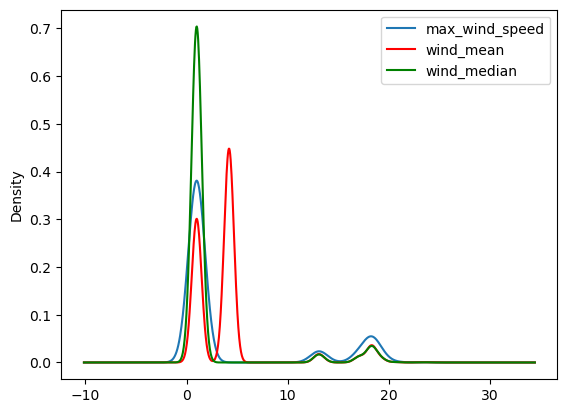

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['max_wind_speed'].plot(kind='kde',ax=ax)
X_train['wind_mean'].plot(kind='kde',ax=ax,color='red')
X_train['wind_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

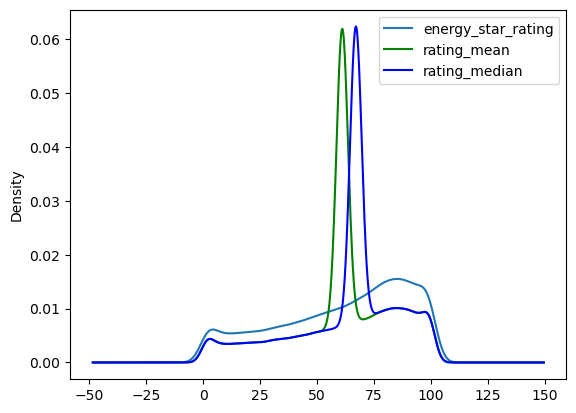

In [103]:
fig = plt.figure()
ax=fig.add_subplot(111)

X_train['energy_star_rating'].plot(kind='kde',ax=ax)
X_train['rating_mean'].plot(kind='kde',color='green',ax=ax)
X_train['rating_median'].plot(kind='kde',color='blue',ax=ax)

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [105]:
X_train.cov()

,max_wind_speed,energy_star_rating,wind_mean,wind_median,rating_mean,rating_median
max_wind_speed,41.890768,-0.254273,41.890768,41.890768,-1.002278,-3.517752
energy_star_rating,-0.254273,822.520945,-0.707943,-3.551529,822.520945,822.520945
wind_mean,41.890768,-0.707943,19.130928,19.130928,-0.457726,-1.606508
wind_median,41.890768,-3.551529,19.130928,21.673667,-2.296269,-3.282549
rating_mean,-1.002278,822.520945,-0.457726,-2.296269,531.807483,531.807483
rating_median,-3.517752,822.520945,-1.606508,-3.282549,531.807483,539.975136


In [107]:
X_train.corr()

,max_wind_speed,energy_star_rating,wind_mean,wind_median,rating_mean,rating_median
max_wind_speed,1.000000,-0.001255,1.000000,1.000000,-0.006730,-0.023315
energy_star_rating,-0.001255,1.000000,-0.005293,-0.024600,1.000000,1.000000
wind_mean,1.000000,-0.005293,1.000000,0.939511,-0.004538,-0.015806
wind_median,1.000000,-0.024600,0.939511,1.000000,-0.021388,-0.030343
rating_mean,-0.006730,1.000000,-0.004538,-0.021388,1.000000,0.992408
rating_median,-0.023315,1.000000,-0.015806,-0.030343,0.992408,1.000000


<Axes: >

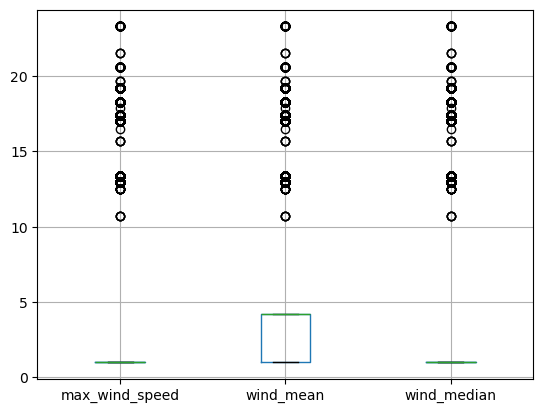

In [115]:
X_train[['max_wind_speed','wind_mean','wind_median']].boxplot()

<Axes: >

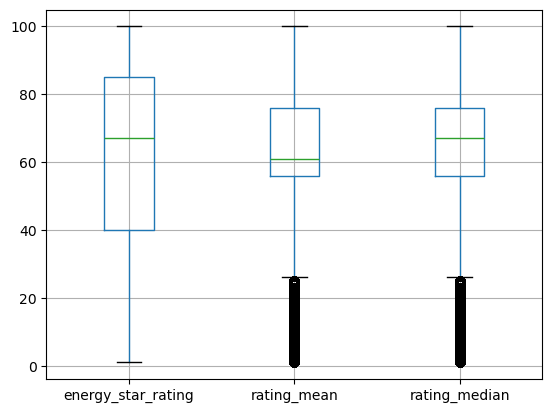

In [117]:
X_train[['energy_star_rating','rating_mean','rating_median']].boxplot()

## Using sklearn

In [120]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [132]:
transformer = ColumnTransformer([('imputer1', imputer1,['max_wind_speed']),('imputer2',imputer2,['energy_star_rating'])],remainder='passthrough')

In [134]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['max_wind_speed']),
                                ('imputer2', SimpleImputer(),
                                 ['energy_star_rating'])])

In [136]:
transformer.named_transformers_['imputer1'].statistics_

array([1.])

In [138]:
transformer.named_transformers_['imputer2'].statistics_

array([61.02161541])